In [2]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert some sample data
sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 15, 1.0),
    ('Oranges', 12, 1.8),
    ('Apples', 5, 2.5),
    ('Bananas', 7, 1.0),
    ('Oranges', 8, 1.8)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [3]:
import pandas as pd

# Define the query
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load query result into DataFrame
df = pd.read_sql_query(query, conn)


In [4]:
print("Sales Summary:\n")
print(df)


Sales Summary:

   product  total_qty  revenue
0   Apples         30     75.0
1  Bananas         44     44.0
2  Oranges         40     72.0


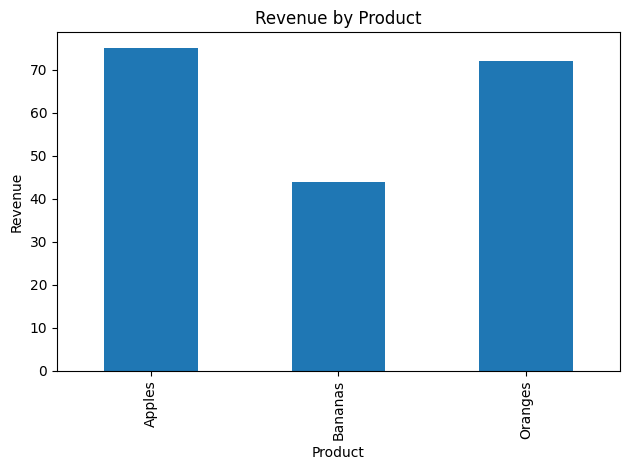

In [5]:
import matplotlib.pyplot as plt

# Bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save as image
plt.show()
